In [213]:
import numpy as np
import gurobipy as gp
import pandas as pd

## Reading the two csv files having stock prices for 2019 and 2020

In [214]:
stocks_2019=pd.read_csv('stocks2019.csv')
stocks_2020=pd.read_csv('stocks2020.csv')

In [215]:
stocks_2019

,X,NDX,ATVI,ADBE,AMD,ALXN,ALGN,GOOGL,GOOG,AMZN,...,TCOM,ULTA,VRSN,VRSK,VRTX,WBA,WDAY,WDC,XEL,XLNX
0,2019-01-02,6360.870117,46.350380,224.570007,18.830000,98.050003,202.119995,1054.680054,1045.849976,1539.130005,...,27.590000,247.970001,147.759995,107.364159,164.080002,63.920757,159.740005,36.312473,46.041862,84.600266
1,2019-01-03,6147.129883,44.704514,215.699997,17.049999,100.209999,184.779999,1025.469971,1016.059998,1500.280029,...,26.959999,243.360001,142.589996,104.083450,163.729996,63.253742,154.020004,33.835327,45.860447,81.414970
2,2019-01-04,6422.669922,46.488358,226.190002,19.000000,106.000000,186.710007,1078.069946,1070.709961,1575.390015,...,28.549999,255.029999,148.970001,108.678413,172.699997,65.358139,163.350006,35.268467,46.309223,85.184715
3,2019-01-07,6488.250000,47.799141,229.259995,20.570000,107.940002,189.919998,1075.920044,1068.390015,1629.510010,...,29.180000,271.000000,151.399994,108.787117,175.850006,65.733910,163.500000,36.521275,46.108707,87.434891
4,2019-01-08,6551.850098,49.247898,232.679993,20.750000,108.610001,192.949997,1085.369995,1076.280029,1656.579956,...,29.480000,276.000000,156.919998,109.755516,178.190002,67.049149,166.949997,36.170105,46.643410,85.769180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,2019-12-23,8696.009766,58.505219,328.950012,45.459999,110.459999,278.140015,1350.630005,1348.839966,1793.000000,...,34.660000,253.020004,192.429993,148.814499,219.979996,56.759140,165.610001,61.401749,61.415092,97.683632
247,2019-12-24,8699.509766,58.425743,329.640015,46.540001,110.279999,277.890015,1344.430054,1343.560059,1789.209961,...,34.470001,252.490005,192.750000,148.436371,220.559998,56.545940,166.190002,60.941479,61.655396,97.278679
248,2019-12-26,8778.309570,58.505219,331.200012,46.630001,108.930000,278.260010,1362.469971,1360.400024,1868.770020,...,34.570000,251.330002,193.710007,148.098038,220.250000,57.078938,165.360001,61.499676,61.586739,97.466339
249,2019-12-27,8770.980469,58.803261,330.790009,46.180000,108.550003,277.640015,1354.640015,1351.890015,1869.800049,...,34.610001,253.169998,194.050003,147.849274,220.970001,57.195225,165.850006,60.843552,61.910412,97.209534


In [216]:
# Stock list for 2019
no_of_stocks_2019=len(stocks_2019.iloc[:,2:].columns.values)
stocks_list=stocks_2019.iloc[:,2:].columns.values
stocks_list

array(['ATVI', 'ADBE', 'AMD', 'ALXN', 'ALGN', 'GOOGL', 'GOOG', 'AMZN',
       'AMGN', 'ADI', 'ANSS', 'AAPL', 'AMAT', 'ASML', 'ADSK', 'ADP',
       'BIDU', 'BIIB', 'BMRN', 'BKNG', 'AVGO', 'CDNS', 'CDW', 'CERN',
       'CHTR', 'CHKP', 'CTAS', 'CSCO', 'CTXS', 'CTSH', 'CMCSA', 'CPRT',
       'COST', 'CSX', 'DXCM', 'DOCU', 'DLTR', 'EBAY', 'EA', 'EXC', 'EXPE',
       'FB', 'FAST', 'FISV', 'GILD', 'IDXX', 'ILMN', 'INCY', 'INTC',
       'INTU', 'ISRG', 'JD', 'KLAC', 'KHC', 'LRCX', 'LBTYA', 'LBTYK',
       'LULU', 'MAR', 'MXIM', 'MELI', 'MCHP', 'MU', 'MSFT', 'MRNA',
       'MDLZ', 'MNST', 'NTES', 'NFLX', 'NVDA', 'NXPI', 'ORLY', 'PCAR',
       'PAYX', 'PYPL', 'PEP', 'PDD', 'QCOM', 'REGN', 'ROST', 'SGEN',
       'SIRI', 'SWKS', 'SPLK', 'SBUX', 'SNPS', 'TMUS', 'TTWO', 'TSLA',
       'TXN', 'TCOM', 'ULTA', 'VRSN', 'VRSK', 'VRTX', 'WBA', 'WDAY',
       'WDC', 'XEL', 'XLNX'], dtype=object)

## Finding Stock Returns for 2019 and 2020

In [217]:
# Finding the returns for stocks in 2019
stocks_2019_returns=stocks_2019.iloc[:,1:].apply(lambda x: (x/x.shift(1))-1)
stocks_2019_returns=stocks_2019_returns.drop(stocks_2019_returns.index[0])
stocks_2019_returns

,NDX,ATVI,ADBE,AMD,ALXN,ALGN,GOOGL,GOOG,AMZN,AMGN,...,TCOM,ULTA,VRSN,VRSK,VRTX,WBA,WDAY,WDC,XEL,XLNX
1,-0.033602,-0.035509,-0.039498,-0.094530,0.022030,-0.085791,-0.027696,-0.028484,-0.025242,-0.015216,...,-0.022834,-0.018591,-0.034989,-0.030557,-0.002133,-0.010435,-0.035808,-0.068217,-0.003940,-0.037651
2,0.044824,0.039903,0.048632,0.114370,0.057779,0.010445,0.051294,0.053786,0.050064,0.034184,...,0.058976,0.047954,0.044744,0.044147,0.054785,0.033269,0.060577,0.042356,0.009786,0.046303
3,0.010211,0.028196,0.013573,0.082632,0.018302,0.017192,-0.001994,-0.002167,0.034353,0.013457,...,0.022067,0.062620,0.016312,0.001000,0.018240,0.005749,0.000918,0.035522,-0.004330,0.026415
4,0.009802,0.030309,0.014918,0.008751,0.006207,0.015954,0.008783,0.007385,0.016612,0.012824,...,0.010281,0.018450,0.036460,0.008902,0.013307,0.020009,0.021101,-0.009615,0.011597,-0.019051
5,0.007454,0.017210,0.011819,-0.026988,0.012430,0.038196,-0.003427,-0.001505,0.001714,-0.001196,...,0.023745,0.018804,-0.008157,0.003781,0.023065,0.012050,-0.004612,0.044083,-0.007984,0.008972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,0.002019,-0.005572,0.004090,0.029672,0.006469,0.019239,-0.000437,-0.000556,0.003638,-0.000123,...,0.002603,0.010060,-0.000104,-0.000869,-0.003217,0.003083,-0.009273,0.026019,-0.017615,0.011868
247,0.000402,-0.001358,0.002098,0.023757,-0.001630,-0.000899,-0.004590,-0.003914,-0.002114,-0.002880,...,-0.005482,-0.002095,0.001663,-0.002541,0.002637,-0.003756,0.003502,-0.007496,0.003913,-0.004146
248,0.009058,0.001360,0.004732,0.001934,-0.012242,0.001331,0.013418,0.012534,0.044467,-0.001774,...,0.002901,-0.004594,0.004981,-0.002279,-0.001406,0.009426,-0.004994,0.009160,-0.001114,0.001929
249,-0.000835,0.005094,-0.001238,-0.009650,-0.003488,-0.002228,-0.005747,-0.006256,0.000551,-0.001530,...,0.001157,0.007321,0.001755,-0.001680,0.003269,0.002037,0.002963,-0.010669,0.005256,-0.002635


In [218]:
# Finding the returns for stocks in 2020
stocks_2020_returns=stocks_2020.iloc[:,1:].apply(lambda x: (x/x.shift(1))-1)
stocks_2020_returns=stocks_2020_returns.drop(stocks_2020_returns.index[0])
stocks_2020_returns

,NDX,ATVI,ADBE,AMD,ALXN,ALGN,GOOGL,GOOG,AMZN,AMGN,...,TCOM,ULTA,VRSN,VRSK,VRTX,WBA,WDAY,WDC,XEL,XLNX
1,-0.008827,0.000341,-0.007834,-0.010183,-0.013260,-0.011421,-0.005231,-0.004907,-0.012139,-0.006789,...,-0.021369,-0.017207,0.021095,0.009727,-0.006699,0.000000,0.005852,-0.015392,0.004809,-0.023020
2,0.006211,0.018238,0.005726,-0.004321,0.001598,0.019398,0.026654,0.024657,0.014886,0.007674,...,-0.013543,0.003118,0.009259,0.002294,0.027755,0.008632,0.006234,-0.019192,-0.001436,-0.020844
3,-0.000234,0.010043,-0.000959,-0.002893,0.002533,-0.009864,-0.001932,-0.000624,0.002092,-0.009405,...,0.045951,0.008528,0.002318,0.008369,-0.001071,-0.005034,0.020414,0.067698,-0.002077,0.022830
4,0.007452,-0.007623,0.013438,-0.008705,0.016191,0.010386,0.007118,0.007880,-0.007809,0.000756,...,-0.012323,0.019400,0.004626,0.009207,0.032620,-0.058357,0.033304,0.014484,-0.000961,-0.002815
5,0.008669,-0.009018,0.007636,0.023834,0.019893,0.036853,0.010498,0.011044,0.004799,0.002980,...,0.006781,0.021318,0.023169,0.009638,-0.003592,-0.020598,0.004309,-0.000291,0.002244,0.023493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,0.005828,-0.005491,-0.005782,0.014586,-0.003647,0.011546,0.009557,0.009242,0.006644,-0.009357,...,0.003254,-0.006681,0.009343,0.000847,-0.002615,-0.000856,0.006268,-0.035714,0.013295,0.017679
185,0.023371,0.016188,0.025894,0.029544,0.021514,0.019398,0.011386,0.011671,0.024949,0.014564,...,0.086486,0.005752,0.017672,0.023190,0.019192,0.011419,0.033974,0.025047,0.021321,0.013534
186,0.019130,0.011978,0.018196,0.018191,-0.009875,0.015507,0.013620,0.013537,0.025498,0.013165,...,0.061360,0.041092,-0.004183,0.017536,-0.001678,0.018064,0.021133,0.003899,0.005109,0.034380
187,-0.003652,-0.014277,0.001679,0.028812,-0.007414,-0.008332,0.005046,0.003284,-0.009190,0.005141,...,-0.022813,-0.012669,0.000928,-0.000759,0.009637,-0.019129,0.001997,0.018125,-0.002905,-0.001638


## Finding Correlation Matrix of Stock Returns

In [219]:
# Finding the correlation matrix for stock returns in 2019
p=np.zeros((no_of_stocks_2019,no_of_stocks_2019))
for i in range(len(p)):
    for j in range(len(p)):
        p[i,j]=stocks_2019_returns.iloc[:,i+1].corr(stocks_2019_returns.iloc[:,j+1])
p

array([[ 1.        ,  0.39993857,  0.36537639, ...,  0.30307745,
         0.04338924,  0.24966667],
       [ 0.39993857,  1.        ,  0.45284767, ...,  0.3615157 ,
         0.20740316,  0.28949742],
       [ 0.36537639,  0.45284767,  1.        , ...,  0.43889211,
         0.01728295,  0.47801032],
       ...,
       [ 0.30307745,  0.3615157 ,  0.43889211, ...,  1.        ,
        -0.07611537,  0.516958  ],
       [ 0.04338924,  0.20740316,  0.01728295, ..., -0.07611537,
         1.        , -0.11755175],
       [ 0.24966667,  0.28949742,  0.47801032, ...,  0.516958  ,
        -0.11755175,  1.        ]])

In [220]:
# Defining the objective function for stock selection 
p_flat=p.flatten()
obj=np.concatenate([p_flat,np.zeros(no_of_stocks_2019)])

In [221]:
# Defining the A matrix for stock selection 
A = np.zeros((no_of_stocks_2019+no_of_stocks_2019**2+1,no_of_stocks_2019+no_of_stocks_2019**2))
A[0,:] = np.concatenate([np.zeros(no_of_stocks_2019**2),np.ones(no_of_stocks_2019)])
for i in range(no_of_stocks_2019):
    A[i+1,:] = np.concatenate([np.zeros(i*no_of_stocks_2019),np.ones(no_of_stocks_2019),np.zeros((no_of_stocks_2019**2-no_of_stocks_2019-i*no_of_stocks_2019)),np.zeros(no_of_stocks_2019)])
for j in range(no_of_stocks_2019**2):
    A[no_of_stocks_2019+1+j,[j,(no_of_stocks_2019**2+(j%no_of_stocks_2019))]]=[1,-1]
A

array([[ 0.,  0.,  0., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., -1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0., -1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0., -1.]])

In [222]:
# Defining the sense matrix for stock selection 
sense = ['=']*(no_of_stocks_2019+1)+['<']*(no_of_stocks_2019**2)

In [223]:
# Defining the b matrix for stock selection (As b matrix depends on the value of m taken, hence have used the below function to return matrix b)
def return_b_stock_selection(m):
    b = np.concatenate([np.array([m]),np.ones(no_of_stocks_2019),np.zeros(no_of_stocks_2019**2)])
    return b

In [224]:
# Saving A, sense and b matrices to be used later in the code for different values of m
A_stock_selection=A.copy()
sense_stock_selection=sense.copy()
obj_stock_selection=obj.copy()

## Question 2

In [225]:
# Running the stock selection model for m=5

b=return_b_stock_selection(5)
ipMod = gp.Model()
ipMod_x = ipMod.addMVar(no_of_stocks_2019+no_of_stocks_2019**2,vtype=['B']*(no_of_stocks_2019+no_of_stocks_2019**2)) # 'C' or 'I' or 'B'
ipMod_con = ipMod.addMConstrs(A, ipMod_x, sense, b)
ipMod.setMObjective(None,obj,0,sense=gp.GRB.MAXIMIZE)

ipMod.Params.OutputFlag = 0 # tell gurobi |to shut up!!
ipMod.optimize()

In [226]:
x_var=ipMod_x.x

In [227]:
ipMod.ObjVal

54.83990652229107

# 5 Stocks to include in Portfolio

In [228]:
# Retrieving the stocks from stcock selection model for m=5
stock_in_portfolio=list(stocks_list[ipMod_x.x[no_of_stocks_2019**2:]==1])
stock_in_portfolio

['LBTYK', 'MXIM', 'MSFT', 'VRTX', 'XEL']

In [229]:
# 2019 stock returns for the stocks for m=5
df_return_stocks_in_portfolio=stocks_2019_returns.loc[:,stock_in_portfolio]
df_return_stocks_in_portfolio

,LBTYK,MXIM,MSFT,VRTX,XEL
1,-0.006280,-0.056845,-0.036788,-0.002133,-0.003940
2,0.068546,0.044004,0.046509,0.054785,0.009786
3,-0.042766,0.010388,0.001275,0.018240,-0.004330
4,-0.036122,-0.015026,0.007251,0.013307,0.011597
5,0.002959,0.027098,0.014300,0.023065,-0.007984
...,...,...,...,...,...
246,0.004617,-0.004213,0.000000,-0.003217,-0.017615
247,0.000919,-0.002604,-0.000191,0.002637,0.003913
248,-0.016988,0.006526,0.008197,-0.001406,-0.001114
249,0.020551,-0.002431,0.001828,0.003269,0.005256


In [230]:
no_of_periods=len(df_return_stocks_in_portfolio)
no_of_stocks_in_portfolio=len(df_return_stocks_in_portfolio.columns.values)

In [231]:
# Initializing the obj, A, b and sense matrices for the optimal weights model

obj = np.concatenate([np.ones(no_of_periods),np.zeros(no_of_stocks_in_portfolio)])
A = np.zeros(((2*no_of_periods+no_of_stocks_in_portfolio+1),len(obj)))
b = np.concatenate([np.zeros(2*no_of_periods+no_of_stocks_in_portfolio),np.ones(1)])
sense = ['>']*(2*no_of_periods+no_of_stocks_in_portfolio)+['=']

In [232]:
# Defining the obj, A, b and sense matrices for the optimal weights model  

for i in range(no_of_periods):
    A[2*i,i] = 1
    A[2*i+1,i] = 1
    for j in range(no_of_stocks_in_portfolio):
        A[2*i,(no_of_periods+j)] = df_return_stocks_in_portfolio.iloc[i,j]
        A[2*i+1,(no_of_periods+j)] = -df_return_stocks_in_portfolio.iloc[i,j]
    b[2*i]=stocks_2019_returns.iloc[i,0]
    b[2*i+1]=-stocks_2019_returns.iloc[i,0]
for k in range(no_of_stocks_in_portfolio):
    A[2*no_of_periods+k,no_of_periods+k] = 1
A[-1,:]=np.concatenate([np.zeros(no_of_periods),np.ones(no_of_stocks_in_portfolio)])    

In [233]:
# Running the model to find the optimal weights for stocks
lpMod = gp.Model()
lpMod_x = lpMod.addMVar(len(obj))
lpMod_con = lpMod.addMConstrs(A, lpMod_x, sense, b)
lpMod.setMObjective(None,obj,0,sense=gp.GRB.MINIMIZE)

lpMod.Params.OutputFlag = 0 # tell gurobi to shut up!!
lpMod.optimize()

In [234]:
#lpMod_x.x

In [235]:
lpMod.ObjVal

0.7891782824631473

## Optimal Weights of stocks

In [236]:
optimal_portfolio_weights=lpMod_x.x[-no_of_stocks_in_portfolio:]
optimal_portfolio_weights

array([0.04886175, 0.21038806, 0.58035198, 0.07119022, 0.089208  ])

# Performance of Portfolio in 2020

In [237]:
df_return_stocks_in_portfolio=stocks_2020_returns.loc[:,stock_in_portfolio]
#df_return_stocks_in_portfolio

In [238]:
portfolio_return_each_period=df_return_stocks_in_portfolio.iloc[:,:].dot(optimal_portfolio_weights)
#portfolio_return_each_period

In [239]:
portfolio_performance=sum(abs(stocks_2020_returns.iloc[:,0]-portfolio_return_each_period))
portfolio_performance

0.8696699433741908

# Question 3 (Varying m)

In [240]:
m_list=[5,10,20,30,40,50,60,70,80,90,100]
m_list

[5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

In [241]:
# Running the two optimization models for different values of m
in_sample_tracking_error_ques3={}
tracking_error_2020_ques3={}
stocks_portfolio_m_ques3={}
optimal_weights_m_ques3={}
portfolio_return_each_period_ques3={}
for m in m_list:
    
    # Running the stock selection model 
    b_stock_selection=return_b_stock_selection(m)
    ipMod = gp.Model()
    ipMod_x = ipMod.addMVar(no_of_stocks_2019+no_of_stocks_2019**2,vtype=['B']*(no_of_stocks_2019+no_of_stocks_2019**2)) # 'C' or 'I' or 'B'
    ipMod_con = ipMod.addMConstrs(A_stock_selection, ipMod_x, sense_stock_selection, b_stock_selection)
    ipMod.setMObjective(None,obj_stock_selection,0,sense=gp.GRB.MAXIMIZE)

    ipMod.Params.OutputFlag = 0 # tell gurobi |to shut up!!
    ipMod.optimize()
    
    # Stocks to be considered in portfolio
    stock_in_portfolio=list(stocks_list[ipMod_x.x[no_of_stocks_2019**2:]==1])
    stocks_portfolio_m_ques3[m]=stock_in_portfolio
    
    df_return_stocks_in_portfolio=stocks_2019_returns.loc[:,stock_in_portfolio]
    
    no_of_periods=len(df_return_stocks_in_portfolio)
    no_of_stocks_in_portfolio=len(df_return_stocks_in_portfolio.columns.values)
    
    # Initializing and defining A, b, sense and obj matrices that go into into the optimal weights model
    obj = np.concatenate([np.ones(no_of_periods),np.zeros(no_of_stocks_in_portfolio)])
    A = np.zeros(((2*no_of_periods+no_of_stocks_in_portfolio+1),len(obj)))
    b = np.concatenate([np.zeros(2*no_of_periods+no_of_stocks_in_portfolio),np.ones(1)])
    sense = ['>']*(2*no_of_periods+no_of_stocks_in_portfolio)+['=']
    
    for i in range(no_of_periods):
        A[2*i,i] = 1
        A[2*i+1,i] = 1
        for j in range(no_of_stocks_in_portfolio):
            A[2*i,(no_of_periods+j)] = df_return_stocks_in_portfolio.iloc[i,j]
            A[2*i+1,(no_of_periods+j)] = -df_return_stocks_in_portfolio.iloc[i,j]
        b[2*i]=stocks_2019_returns.iloc[i,0]
        b[2*i+1]=-stocks_2019_returns.iloc[i,0]
    for k in range(no_of_stocks_in_portfolio):
        A[2*no_of_periods+k,no_of_periods+k] = 1
    A[-1,:]=np.concatenate([np.zeros(no_of_periods),np.ones(no_of_stocks_in_portfolio)])
        
    # Running the optimal weights model
    lpMod = gp.Model()
    lpMod_x = lpMod.addMVar(len(obj))
    lpMod_con = lpMod.addMConstrs(A, lpMod_x, sense, b)
    lpMod.setMObjective(None,obj,0,sense=gp.GRB.MINIMIZE)

    lpMod.Params.OutputFlag = 0 # tell gurobi to shut up!!
    lpMod.optimize()
    
    in_sample_performance=lpMod.ObjVal # 2019 in-sample performance/ tracking error
    in_sample_tracking_error_ques3[m]=in_sample_performance
    
    optimal_portfolio_weights=lpMod_x.x[-no_of_stocks_in_portfolio:] # Optimal weights of stocks in portfolio
    optimal_weights_m_ques3[m]=optimal_portfolio_weights
    
    df_stock_weights=pd.DataFrame(list(zip(stock_in_portfolio, optimal_portfolio_weights)),columns =['Portfolio Stocks', 'Weights'])
    
    df_return_stocks_in_portfolio=stocks_2020_returns.loc[:,stock_in_portfolio]
    portfolio_return_each_period=df_return_stocks_in_portfolio.iloc[:,:].dot(optimal_portfolio_weights)
    portfolio_return_each_period_ques3[m]=portfolio_return_each_period
    
    portfolio_performance=sum(abs(stocks_2020_returns.iloc[:,0]-portfolio_return_each_period)) # 2020 Tracking error
    tracking_error_2020_ques3[m]=portfolio_performance
    
    print("m=",m)
    print(df_stock_weights)
    print("Tracking Error in 2020:",portfolio_performance)
    print("In Sample Tracking Error in 2019:",in_sample_performance)

m= 5
  Portfolio Stocks   Weights
0            LBTYK  0.048862
1             MXIM  0.210388
2             MSFT  0.580352
3             VRTX  0.071190
4              XEL  0.089208
Tracking Error in 2020: 0.8696699433741908
In Sample Tracking Error in 2019: 0.7891782824631473
m= 10
  Portfolio Stocks   Weights
0             ATVI  0.041131
1             ALGN  0.012208
2             BKNG  0.039471
3              KHC  0.021508
4            LBTYK  0.028071
5             MXIM  0.163244
6             MSFT  0.481527
7             ROST  0.089807
8             VRTX  0.057000
9              XEL  0.066032
Tracking Error in 2020: 0.8313165184500253
In Sample Tracking Error in 2019: 0.686533011145812
m= 20
   Portfolio Stocks   Weights
0              ATVI  0.024613
1              ALGN  0.012773
2             GOOGL  0.204352
3              ANSS  0.074454
4               ADP  0.019414
5              BIIB  0.006517
6             CMCSA  0.045297
7              DLTR  0.019957
8              EXPE  0.007310

m= 90
   Portfolio Stocks   Weights
0              ATVI  0.003441
1              ADBE  0.020015
2               AMD  0.004609
3              ALXN  0.003648
4              ALGN  0.000023
..              ...       ...
85              WBA  0.008059
86             WDAY  0.001399
87              WDC  0.002064
88              XEL  0.007810
89             XLNX  0.007687

[90 rows x 2 columns]
Tracking Error in 2020: 0.2475816303706392
In Sample Tracking Error in 2019: 0.05377918984547195
m= 100
   Portfolio Stocks   Weights
0              ATVI  0.004223
1              ADBE  0.017138
2               AMD  0.004037
3              ALXN  0.002450
4              ALGN  0.000000
..              ...       ...
95              WBA  0.009130
96             WDAY  0.002555
97              WDC  0.000000
98              XEL  0.003662
99             XLNX  0.005442

[100 rows x 2 columns]
Tracking Error in 2020: 0.24993623175722912
In Sample Tracking Error in 2019: 0.04491081635614749


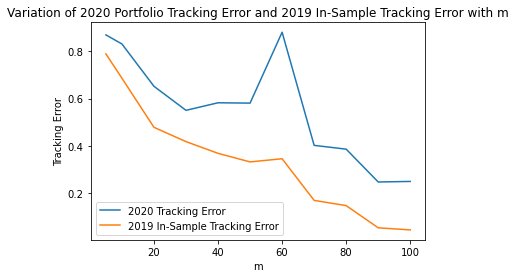

In [242]:
# Plotting line charts for in-sample and out-of-sample performance from the MIP model for different values of m
import matplotlib.pyplot as plt

tracking_error_2020_list_ques3=list(tracking_error_2020_ques3.values())
m_values_ques3=list(tracking_error_2020.keys())
in_sample_tracking_error_list_ques3=list(in_sample_tracking_error_ques3.values())

plt.plot(m_values_ques3,tracking_error_2020_list_ques3,label = "2020 Tracking Error")
plt.plot(m_values_ques3,in_sample_tracking_error_list_ques3,label = "2019 In-Sample Tracking Error")
plt.xlabel('m')
plt.ylabel('Tracking Error')
plt.title('Variation of 2020 Portfolio Tracking Error and 2019 In-Sample Tracking Error with m')
plt.legend()
plt.show()

In [243]:
# Creating a dataframe that stores all the results
stocks_portfolio_m_list_ques3=list(stocks_portfolio_m_ques3.values())
optimal_weights_m_list_ques3=list(optimal_weights_m_ques3.values())
stocks_weights_df_ques3= pd.DataFrame({'m':m_values,
             '2020 Tracking Error': tracking_error_2020_list_ques3,
             '2019 In-Sample Tracking Error':in_sample_tracking_error_list_ques3,
             'Stocks Selected': stocks_portfolio_m_list_ques3,
             'Optimal Stock Weights':optimal_weights_m_list_ques3})   
stocks_weights_df_ques3

,m,2020 Tracking Error,2019 In-Sample Tracking Error,Stocks Selected,Optimal Stock Weights
0,5,0.869670,0.789178,"[LBTYK, MXIM, MSFT, VRTX, XEL]","[0.04886174835252491, 0.21038806005665553, 0.5..."
1,10,0.831317,0.686533,"[ATVI, ALGN, BKNG, KHC, LBTYK, MXIM, MSFT, ROS...","[0.04113108880018398, 0.012208224438274592, 0...."
2,20,0.652338,0.478836,"[ATVI, ALGN, GOOGL, ANSS, ADP, BIIB, CMCSA, DL...","[0.0246128451625659, 0.012773472041639327, 0.2..."
3,30,0.550662,0.418279,"[ATVI, ADBE, GOOGL, AMAT, ADP, BIIB, CTXS, CMC...","[0.016378555223330676, 0.038975319529575385, 0..."
4,40,0.582591,0.368785,"[ATVI, ADBE, ALGN, GOOGL, AMGN, AMAT, ADP, BII...","[0.022628982812142484, 0.023840141178068423, 0..."
5,50,0.581148,0.332540,"[ATVI, ADBE, ALXN, ALGN, GOOGL, AMGN, AMAT, AD...","[0.01945631641397821, 0.03434141488995112, 0.0..."
6,60,0.880871,0.345927,"[ATVI, ADBE, AMD, ALXN, ALGN, GOOGL, AMGN, AMA...","[0.01732165395289185, 0.05101686947636424, 0.0..."
7,70,0.402497,0.169824,"[ATVI, AMD, ALXN, ALGN, GOOG, AMGN, AAPL, AMAT...","[0.011191256355570224, 0.007895151456320913, 0..."
8,80,0.386431,0.147683,"[ATVI, AMD, ALXN, ALGN, GOOGL, AMGN, AAPL, AMA...","[0.008611353419442337, 0.006452940814983654, 0..."
9,90,0.247582,0.053779,"[ATVI, ADBE, AMD, ALXN, ALGN, GOOG, AMZN, AMGN...","[0.003440798812385665, 0.020014628603631023, 0..."


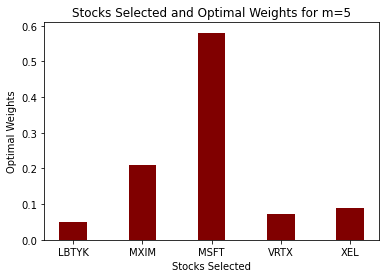

In [244]:
import matplotlib.pyplot as plt
# creating the bar plot for optimal weights for m=5
plt.bar(stocks_portfolio_m_list_ques3[0], optimal_weights_m_list_ques3[0], color ='maroon',
        width = 0.4)
plt.xlabel("Stocks Selected")
plt.ylabel("Optimal Weights")
plt.title("Stocks Selected and Optimal Weights for m=5")
plt.show()

# Question 4) MIP

In [125]:
m_list=[5,10,20,30,40,50,60,70,80,90,100]
m_list

[5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

In [126]:
import os
path = 'Portfolio Stocks_Weights.csv'
# Check whether a path pointing to a file
isFile = os.path.isfile(path)

if isFile:
    df_stocks_weights=pd.read_csv(path)
    print(df_stocks_weights)

else:
    # Initializing dictionaries that capture metrics for different values of m
    in_sample_tracking_error={}
    tracking_error_2020={}
    stocks_portfolio_m={}
    optimal_weights_m={}


    for m in m_list:

        df_return_all_stocks=stocks_2019_returns.iloc[:,1:]

        no_of_periods=len(df_return_all_stocks)
        no_of_stocks=len(df_return_all_stocks.columns.values)

        # Initializing and defining A, b, sense and obj matrices that go into into the MIP model
        obj = np.concatenate([np.ones(no_of_periods),np.zeros(no_of_stocks),np.zeros(no_of_stocks)])

        # Big M value taken to be M as the optimal weights lie between 0 and 1
        M=1

        A = np.zeros(((2*no_of_periods+2*no_of_stocks+2),len(obj)))
        b = np.concatenate([np.zeros(2*no_of_periods+no_of_stocks),np.ones(1),np.zeros(no_of_stocks),m*np.ones(1)])
        sense = ['>']*(2*no_of_periods+no_of_stocks)+['=']+['<']*(no_of_stocks)+['=']

        for i in range(no_of_periods):
            A[2*i,i] = 1
            A[2*i+1,i] = 1
            for j in range(no_of_stocks):
                A[2*i,(no_of_periods+j)] = df_return_all_stocks.iloc[i,j]
                A[2*i+1,(no_of_periods+j)] = -df_return_all_stocks.iloc[i,j]
            b[2*i]=stocks_2019_returns.iloc[i,0]
            b[2*i+1]=-stocks_2019_returns.iloc[i,0]

        for k in range(no_of_stocks):
            A[2*no_of_periods+k,no_of_periods+k] = 1

        A[2*no_of_periods+no_of_stocks,:]=np.concatenate([np.zeros(no_of_periods),np.ones(no_of_stocks),np.zeros(no_of_stocks)])

        for k in range(no_of_stocks):
            A[2*no_of_periods+no_of_stocks+k+1,no_of_periods+k] = 1
            A[2*no_of_periods+no_of_stocks+k+1,no_of_periods+no_of_stocks+k] = -M # Defining the Big M constraint

        A[-1,:]=np.concatenate([np.zeros(no_of_periods),np.zeros(no_of_stocks),np.ones(no_of_stocks)])   

        # Running the MIP model
        lpMod = gp.Model()
        lpMod_x = lpMod.addMVar(len(obj),vtype=['C']*(no_of_periods+no_of_stocks)+['B']*(no_of_stocks))
        lpMod_con = lpMod.addMConstrs(A, lpMod_x, sense, b)
        lpMod.setMObjective(None,obj,0,sense=gp.GRB.MINIMIZE)

        lpMod.Params.OutputFlag = 0 # tell gurobi to shut up!!
        lpMod.Params.TimeLimit = 3600
        lpMod.optimize()


        in_sample_performance=lpMod.ObjVal  # 2019 in-sample performance/ tracking error
        in_sample_tracking_error[m]=in_sample_performance


        stock_in_portfolio=list(stocks_list[lpMod_x.x[no_of_periods+no_of_stocks:]==1]) # Stocks to be considered in portfolio
        stocks_portfolio_m[m]=stock_in_portfolio

        weights_vector=lpMod_x.x[no_of_periods:(no_of_periods+no_of_stocks)] 
        optimal_portfolio_weights=weights_vector[lpMod_x.x[no_of_periods+no_of_stocks:]==1] # Optimal weights of stocks in portfolio
        optimal_weights_m[m]=optimal_portfolio_weights

        df_stock_weights=pd.DataFrame(list(zip(stock_in_portfolio, optimal_portfolio_weights)),columns =['Portfolio Stocks', 'Weights'])

        df_return_stocks_in_portfolio=stocks_2020_returns.loc[:,stock_in_portfolio]
        portfolio_return_each_period=df_return_stocks_in_portfolio.iloc[:,:].dot(optimal_portfolio_weights)


        portfolio_performance=sum(abs(stocks_2020_returns.iloc[:,0]-portfolio_return_each_period)) # 2020 Tracking error
        tracking_error_2020[m]=portfolio_performance

        print("m=",m)
        print(df_stock_weights)
        print("Tracking Error in 2020:",portfolio_performance)
        print("In Sample Tracking Error in 2019:",in_sample_performance)

m= 5
  Portfolio Stocks   Weights
0             AMZN  0.250123
1              ADI  0.113758
2             AAPL  0.191692
3             MSFT  0.289869
4             MDLZ  0.154558
Tracking Error in 2020: 0.5913979244173765
In Sample Tracking Error in 2019: 0.499258692054636
m= 10
  Portfolio Stocks   Weights
0            GOOGL  0.101079
1             AMZN  0.130624
2             AAPL  0.147074
3             CTXS  0.069313
4               FB  0.084641
5             INTC  0.051278
6             MSFT  0.159945
7             PAYX  0.120776
8              TXN  0.098831
9              WBA  0.036439
Tracking Error in 2020: 0.5182203723542855
In Sample Tracking Error in 2019: 0.30186224664225353
m= 20
   Portfolio Stocks   Weights
0              ATVI  0.011486
1              ADBE  0.059570
2               AMD  0.000000
3              ALXN  0.012643
4             GOOGL  0.101109
5              GOOG  0.000000
6              AMZN  0.184825
7              AMGN  0.044466
8              AAPL  0.13730

m= 90
   Portfolio Stocks   Weights
0              ATVI  0.004223
1              ADBE  0.017140
2               AMD  0.004037
3              ALXN  0.002450
4             GOOGL  0.056829
..              ...       ...
85             VRTX  0.008832
86              WBA  0.009131
87             WDAY  0.002556
88              XEL  0.003662
89             XLNX  0.005442

[90 rows x 2 columns]
Tracking Error in 2020: 0.24994327434029953
In Sample Tracking Error in 2019: 0.04491081639360335
m= 100
   Portfolio Stocks   Weights
0              ATVI  0.004223
1              ADBE  0.017138
2               AMD  0.004037
3              ALXN  0.002450
4              ALGN  0.000000
..              ...       ...
95              WBA  0.009130
96             WDAY  0.002555
97              WDC  0.000000
98              XEL  0.003662
99             XLNX  0.005442

[100 rows x 2 columns]
Tracking Error in 2020: 0.24993623175722912
In Sample Tracking Error in 2019: 0.04491081640839281


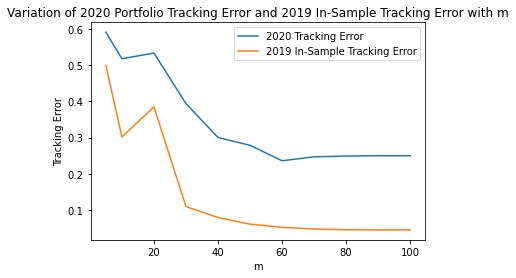

In [127]:
# Plotting line charts for in-sample and out-of-sample performance from the MIP model for different values of m
import matplotlib.pyplot as plt

tracking_error_2020_list=list(tracking_error_2020.values())
m_values=list(tracking_error_2020.keys())
in_sample_tracking_error_list=list(in_sample_tracking_error.values())

plt.plot(m_values,tracking_error_2020_list,label = "2020 Tracking Error")
plt.plot(m_values,in_sample_tracking_error_list,label = "2019 In-Sample Tracking Error")
plt.xlabel('m')
plt.ylabel('Tracking Error')
plt.title('Variation of 2020 Portfolio Tracking Error and 2019 In-Sample Tracking Error with m')
plt.legend()
plt.show()

In [128]:
# Creating a dataframe that stores all the results
stocks_portfolio_m_list=list(stocks_portfolio_m.values())
optimal_weights_m_list=list(optimal_weights_m.values())
stocks_weights_df= pd.DataFrame({'m':m_values,
             '2020 Tracking Error': tracking_error_2020_list,
             '2019 In-Sample Tracking Error':in_sample_tracking_error_list,
             'Stocks Selected': stocks_portfolio_m_list,
             'Optimal Stock Weights':optimal_weights_m_list})   
stocks_weights_df

,m,2020 Tracking Error,2019 In-Sample Tracking Error,Stocks Selected,Optimal Stock Weights
0,5,0.591398,0.499259,"[AMZN, ADI, AAPL, MSFT, MDLZ]","[0.2501225979998439, 0.11375807105291451, 0.19..."
1,10,0.518220,0.301862,"[GOOGL, AMZN, AAPL, CTXS, FB, INTC, MSFT, PAYX...","[0.10107942442492181, 0.13062393741220038, 0.1..."
2,20,0.533836,0.385102,"[ATVI, ADBE, AMD, ALXN, GOOGL, GOOG, AMZN, AMG...","[0.011485932796080116, 0.059569856056554, 0.0,..."
3,30,0.393863,0.109405,"[ADBE, GOOGL, AMZN, AMGN, AAPL, ADP, BIDU, BKN...","[0.029247917295816484, 0.08665842835568552, 0...."
4,40,0.300330,0.079215,"[ATVI, ADBE, GOOGL, AMZN, AMGN, AAPL, ADP, BII...","[0.005928919458291493, 0.0205553196367539, 0.0..."
5,50,0.278776,0.060758,"[ADBE, AMD, GOOGL, AMZN, AMGN, AAPL, ADP, BIDU...","[0.02254720386448382, 0.0041693560205407765, 0..."
6,60,0.236082,0.051953,"[ATVI, ADBE, AMD, GOOG, AMZN, AMGN, AAPL, AMAT...","[0.006200078580536943, 0.01938727231578326, 0...."
7,70,0.247045,0.047568,"[ATVI, ADBE, AMD, GOOGL, AMZN, AMGN, AAPL, AMA...","[0.0022014181770870726, 0.01929402349358076, 0..."
8,80,0.249124,0.045227,"[ATVI, ADBE, AMD, ALXN, GOOGL, GOOG, AMZN, AMG...","[0.0031196129505436294, 0.017842007035128473, ..."
9,90,0.249943,0.044911,"[ATVI, ADBE, AMD, ALXN, GOOGL, GOOG, AMZN, AMG...","[0.004223289593193305, 0.017140049274027642, 0..."


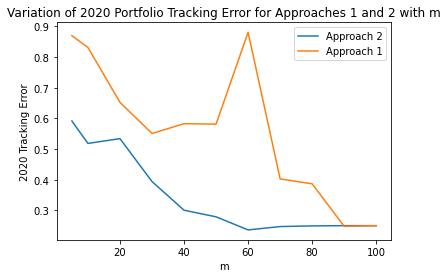

In [210]:
# Plotting line charts for out-of-sample performance for appraoches 1 and 2 for different values of m
import matplotlib.pyplot as plt

plt.plot(m_values,stocks_weights_df['2020 Tracking Error'],label = "Approach 2")
plt.plot(m_values,stocks_weights_df_ques3['2020 Tracking Error'],label = "Approach 1")
plt.xlabel('m')
plt.ylabel('2020 Tracking Error')
plt.title('Variation of 2020 Portfolio Tracking Error for Approaches 1 and 2 with m')
plt.legend()
plt.show()

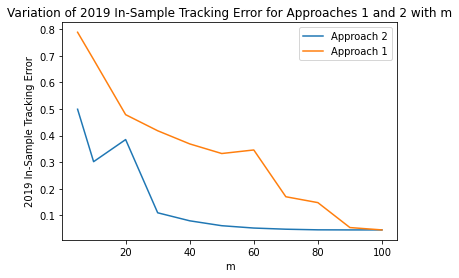

In [212]:
# Plotting line charts for in-sample performance for appraoches 1 and 2 for different values of m
import matplotlib.pyplot as plt

plt.plot(m_values,stocks_weights_df['2019 In-Sample Tracking Error'],label = "Approach 2")
plt.plot(m_values,stocks_weights_df_ques3['2019 In-Sample Tracking Error'],label = "Approach 1")
plt.xlabel('m')
plt.ylabel('2019 In-Sample Tracking Error')
plt.title('Variation of 2019 In-Sample Tracking Error for Approaches 1 and 2 with m')
plt.legend()
plt.show()

In [129]:
# Saving results in a csv file
stocks_weights_df.to_csv('Portfolio Stocks_Weights.csv')